# Lecture 11: More About Areas

Let us try to write a code to plot a region enclosed by two curves and two vertical lines. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def reg_func(f, g, a, b, e1, e2): 
    x = np.linspace(a - e1, b + e2 , endpoint = True)
    plt.plot(x, f(x), label = "$y=f(x)$")
    plt.plot(x, g(x), label = "$y=g(x)$")
    
    X = np.linspace(a, b , endpoint = True)
    plt.fill_between(X, f(X), g(X), where = f(X) != g(X), edgecolor='b',alpha=0.2)
    plt.text(0.5 * (a + b), 0.5*f(0.5*(a+b)) + 0.5*g(0.5*(a+b)) , "$S$",
        horizontalalignment='center', fontsize=20)
    plt.xlabel('x')               
    plt.ylabel('y')  
    plt.legend()
    plt.savefig('name.png', format='png')
    plt.show()

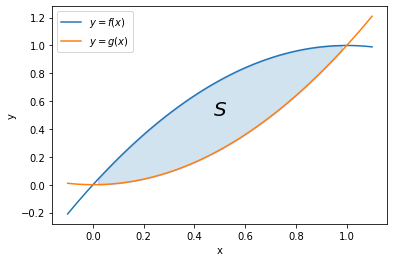

In [2]:
f = lambda x: 2*x - x**2
g = lambda x:  x**2

reg_func(f,g,a=0, b=1, e1 = 0.1, e2=0.1)

In [3]:
def reg_func1(f, g, a, b, e1, e2, N, alpha):
      # X values for the rule
    X = np.linspace(a , b ,N+1)
    Y_f = f(X)
    Y_g = g(X)

    # X and Y values for plotting y=f(x)
    x = np.linspace(a -e1 ,b +e2,100)
    y_f = f(x)
    y_g = g(x)
    plt.plot(x, y_f, label = "$y=f(x)$")
    plt.plot(x, y_g, label = "$y=g(x)$")
    
    for i in range(N):
        xs = [X[i],X[i],X[i+1],X[i+1]]
        ys = [ g((1-alpha)*X[i] + alpha*X[i+1]) , f((1-alpha)*X[i] + alpha*X[i+1]), 
              f( (1-alpha)*X[i] + alpha*X[i+1]),  g((1-alpha)*X[i] + alpha*X[i+1])]
        plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)
    plt.xlabel('x')               
    plt.ylabel('y')
    plt.legend()
    plt.savefig('s_reg1.png', format='png')
    plt.show()
    

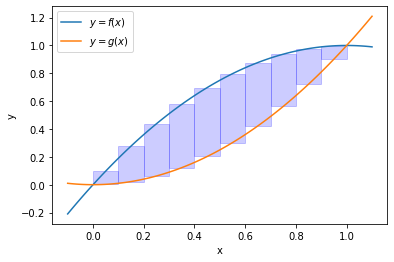

In [4]:
f = lambda x: 2*x - x**2
g = lambda x:  x**2

reg_func1(f, g, a=0, b=1, e1 = 0.1, e2 = 0.1,  N=10, alpha=0.5)

### Example 3.1.2
The area of our region is $\displaystyle \int^1_0 e^x - x\; dx$.

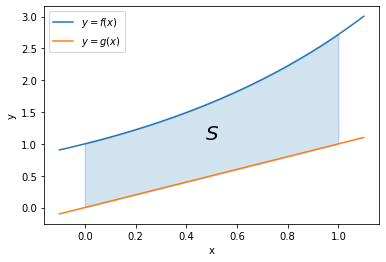

In [6]:
f = lambda x: np.exp(x)
g = lambda x:  x

reg_func(f, g, a=0, b=1, e1 = 0.1, e2=0.1)

In [5]:
import scipy.integrate as integrate
import scipy.special as special

h = lambda x: abs(f(x) - g(x))
A = integrate.quad(h, 0, 1)[0]
A

0.3333333333333333

### Example 3.1.3
The area of our region is $\displaystyle \int^1_0 |2x-2x^2|\; dx$.

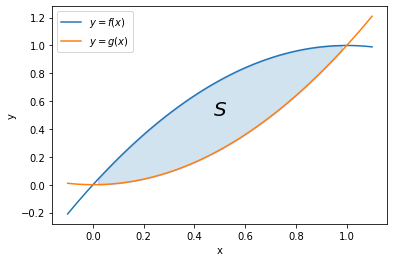

In [11]:
f = lambda x: 2*x - x**2
g = lambda x:  x**2

reg_func(f,g,a=0, b=1, e1 = 0.1, e2=0.1)

In [12]:
h = lambda x: abs(f(x)-g(x))
A = integrate.quad(h, 0, 1)[0]
A


0.3333333333333333

### Example 3.1.4
Let us first find the interstion of two curves: 
$y=\dfrac{x}{\sqrt{x^2+1}}$ and $y=x^4-x$.


In [6]:
f = lambda x: x/np.sqrt(x**2+1)
g = lambda x:  x**4 - x
h = lambda x: abs(f(x) - g(x))

from scipy.optimize import fsolve
b = fsolve(h, 1)[0]
b

1.1807757031062658

We next plot the graph of $f$ and $g$. 

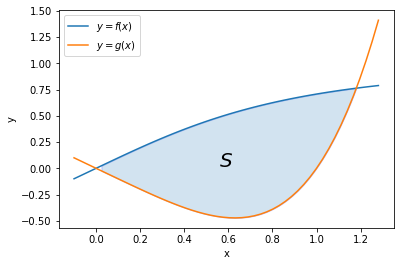

In [20]:
reg_func(f, g, a=0, b=b, e1 = 0.1, e2=0.1)

In [7]:
A = integrate.quad(h, 0, b)[0]
A

0.7853885504955637

### Example 3.1.5



In [8]:
import sympy as sp
from sympy import symbols, Eq, solve

x, y = sp.symbols('x y')
x_L = 0.5*y**2 - 3
x_R = y + 1
eq = Eq(x_R - x_L)
sol = solve(eq)
sol


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sympy/core/relational.py:486: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


[-2.00000000000000, 4.00000000000000]

In [9]:
h = lambda t: abs(x_R.subs(y,t) - x_L.subs(y,t))
A = integrate.quad(h, sol[0], sol[1])[0]
A

18.0

Plot the parametric equations.

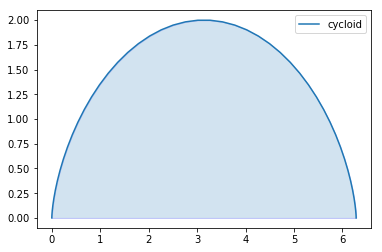

In [14]:
r=1
theta = np.linspace(0, 2*np.pi, endpoint = True)
x = r*(theta - np.sin(theta))
y = r*(1 - np.cos(theta))
plt.plot(x,y, label = "cycloid")
plt.fill_between(x, y, edgecolor='b',alpha=0.2)
plt.legend()
plt.savefig('f30.png', format='png')
plt.show()
